## Task 1: Data Retrieving

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
data1 = pd.read_csv('haberman.data.csv', sep=',', header=None, names=['age', 'year', 'nodes', 'status'])

In [3]:
#Viewing the data
data1.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
#Viewing the data
data1

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
#Understanding the rows and columns making up the data
data1.shape

(306, 4)

In [6]:
#Check for missing values
data1.isnull().values.any()
data1.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [7]:
#Data types of the features
data1.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [8]:
# Age attribute
data1['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [9]:
#There does not seem to be any impossible values in this attribute

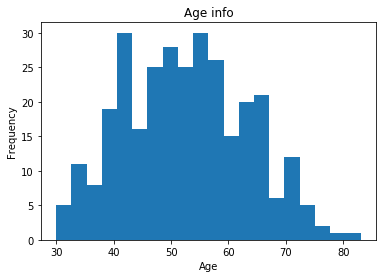

In [10]:
data1['age'].plot(kind='hist',bins=20)
plt.title('Age info')
plt.xlabel('Age')
plt.show()

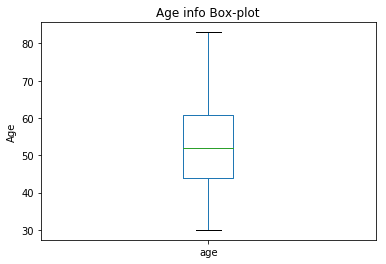

In [11]:
data1['age'].plot(kind='box')
plt.title('Age info Box-plot')
plt.ylabel('Age')
plt.show()

In [12]:
#The distribution looks fairly symmetric

In [13]:
#Year attribute
data1['year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [14]:
#This study contains observations between the year 1958 and 1970. 

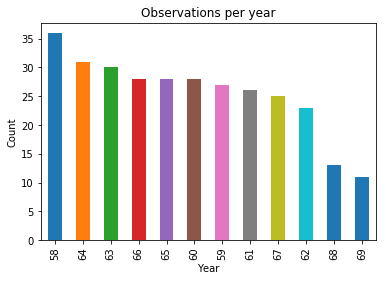

In [15]:
data1['year'].value_counts().plot(kind='bar')
plt.title('Observations per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [16]:
#Nodes attribute
data1['nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

In [17]:
# We do not observe any impossible values.
# It seems that in general it is not common to detect a large number of positive axillary nodes.

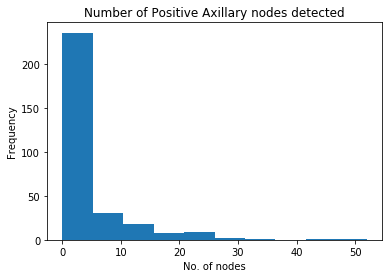

In [18]:
data1['nodes'].plot(kind='hist',bins=10)
plt.title('Number of Positive Axillary nodes detected')
plt.xlabel('No. of nodes')
plt.show()

In [19]:
# This further confirms our earlier observations and we see a left skew in the data

In [20]:
#Status - Target attribute
data1['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

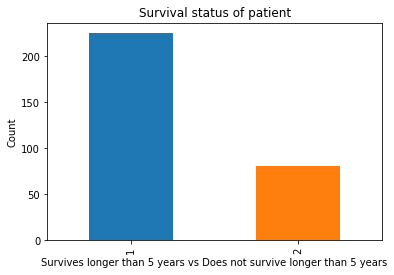

In [21]:
data1['status'].value_counts().plot(kind='bar')
plt.title('Survival status of patient')
plt.xlabel('Survives longer than 5 years vs Does not survive longer than 5 years')
plt.ylabel('Count')
plt.show()

In [22]:
def get_bounds(val,range_years,upper=True):
    # get remainder
    rem = val % range_years
    bounds = 0
    if rem != 0:
        bounds = range_years - rem
    
    return val + bounds

def get_ranges(data,range_years):
    # Get the lower and upper bounds of the data
    lower, upper = min(data), max(data)
    
    # Split the data by the years
    lower_bounds = get_bounds(lower,range_years,upper=False)
    upper_bounds = get_bounds(upper,range_years)
    
    # Create the ranges dict
    ranges = []
    for i in range((lower_bounds + range_years),(upper_bounds + range_years),range_years):
        d = {
            'upper_age': i,
            'lower_age': i - range_years,
            'count': 0
        }
        ranges.append(d)
        
    return ranges

def age_count(data,range_years=5):
    # Get the ranges array
    l = get_ranges(data['age'],range_years)
    # age group array
    group_array = []
    # Categrorize the ages based on the age groups
    for a in l:
        for d in data['age']:
            if d >= a['lower_age'] and d < a['upper_age']:
                # Increment the count of the age group by 1
                a['count'] += 1
                # Add the age to the age group array
                group_array.append('{} - {}'.format(a['lower_age'],a['upper_age']))
    # Add the age group array as column to the dataset
    data['age_group'] = group_array
    return data
        
print(age_count(data1,range_years=5))
        

     age  year  nodes  status age_group
0     30    64      1       1   30 - 35
1     30    62      3       1   30 - 35
2     30    65      0       1   30 - 35
3     31    59      2       1   30 - 35
4     31    65      4       1   30 - 35
5     33    58     10       1   30 - 35
6     33    60      0       1   30 - 35
7     34    59      0       2   30 - 35
8     34    66      9       2   30 - 35
9     34    58     30       1   30 - 35
10    34    60      1       1   30 - 35
11    34    61     10       1   30 - 35
12    34    67      7       1   30 - 35
13    34    60      0       1   30 - 35
14    35    64     13       1   35 - 40
15    35    63      0       1   35 - 40
16    36    60      1       1   35 - 40
17    36    69      0       1   35 - 40
18    37    60      0       1   35 - 40
19    37    63      0       1   35 - 40
20    37    58      0       1   35 - 40
21    37    59      6       1   35 - 40
22    37    60     15       1   35 - 40
23    37    63      0       1   35 - 40


In [23]:
 data1['age_group'].value_counts().sort_index()

30 - 35    14
35 - 40    26
40 - 45    40
45 - 50    44
50 - 55    56
55 - 60    43
60 - 65    35
65 - 70    27
70 - 75    16
75 - 80     4
80 - 85     1
Name: age_group, dtype: int64

## Task 2: Data Exploration

In [24]:
#Do number of nodes vary with age?

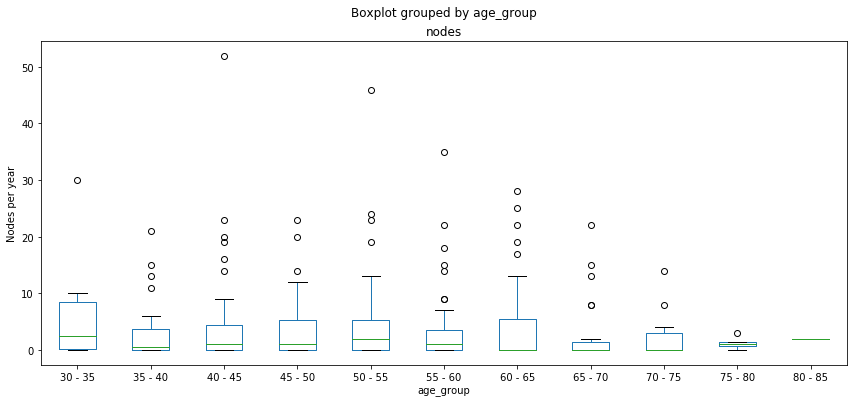

In [25]:
data1.boxplot(column='nodes',by='age_group',figsize=(14,6),grid=False)
plt.ylabel('Nodes per year')
plt.show()

In [26]:
# Does age affect survival status?

In [27]:
bar_data = data1

grouped = bar_data.groupby(['status','age_group'])
grouped.size()


status  age_group
1       30 - 35      12
        35 - 40      24
        40 - 45      28
        45 - 50      29
        50 - 55      38
        55 - 60      35
        60 - 65      26
        65 - 70      18
        70 - 75      12
        75 - 80       3
2       30 - 35       2
        35 - 40       2
        40 - 45      12
        45 - 50      15
        50 - 55      18
        55 - 60       8
        60 - 65       9
        65 - 70       9
        70 - 75       4
        75 - 80       1
        80 - 85       1
dtype: int64

In [28]:
status_table =  pd.crosstab(index=bar_data['status'],columns=bar_data['age_group'])
status_table

age_group,30 - 35,35 - 40,40 - 45,45 - 50,50 - 55,55 - 60,60 - 65,65 - 70,70 - 75,75 - 80,80 - 85
status,,,,,,,,,,,
1,12,24,28,29,38,35,26,18,12,3,0
2,2,2,12,15,18,8,9,9,4,1,1


Text(0.5,1,u'Survival status of patient by age-group')

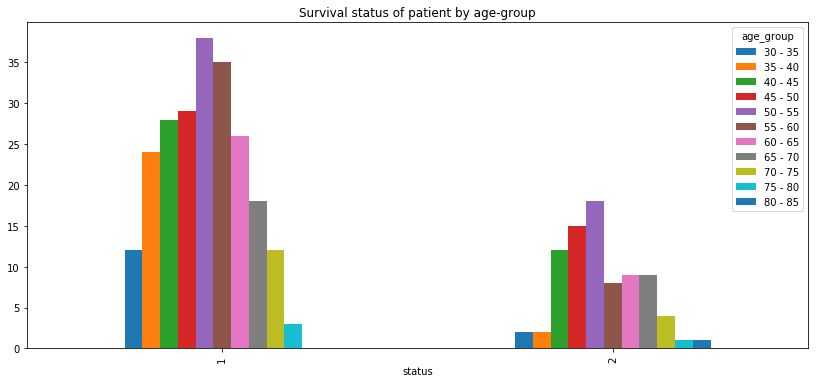

In [29]:
status_table.plot(kind='bar',figsize=(14,6))
plt.title('Survival status of patient by age-group')

Text(0.5,1,u'Survival status by no. of nodes detected')

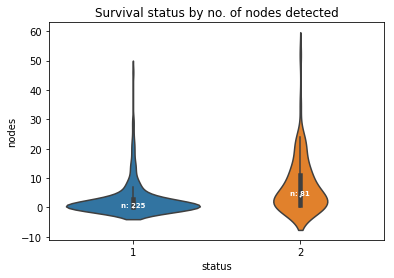

In [30]:
ax = sns.violinplot(x="status", y="nodes",data=data1)

# Calculate number of obs per group & median to position labels
medians = data1.groupby(['status'])['nodes'].median().values
nobs = data1['status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
    
 # Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Survival status by no. of nodes detected')

Text(0.5,0.98,u'Survival status by no. of nodes detected and age of patient')

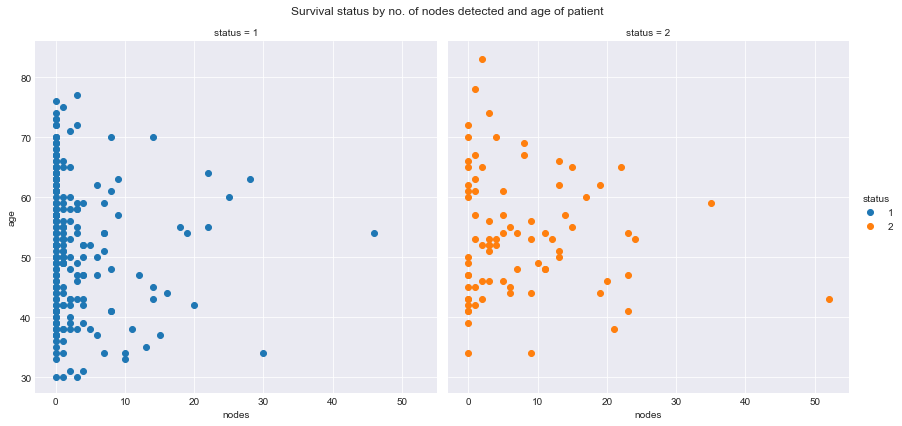

In [31]:
#import seaborn  as se

sns.set_style("darkgrid");
sns.FacetGrid(data1,col="status",hue='status',size=6,col_wrap=2,)\
    .map(plt.scatter,"nodes","age")\
    .add_legend()

#plt.show()
#plt.title('YOUR TITLE HERE')
plt.subplots_adjust(top=0.9)
plt.suptitle('Survival status by no. of nodes detected and age of patient')


## Task 3: Data Modelling

### Model 1: k Nearest Neighbor

In [35]:
# We shall use age, nodes and the year and use a backward elimination technique to 
#find the feature that gives the best score
X = data1.iloc[:, [0,1,2]]
y = data1.iloc[:, 3]



In [52]:
# Fitting classifier
#We start with arbitrary parameters
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='minkowski',p=2)


#When p=1 equal to Manhattan distance
#When p= 2 equal to Euclidean distance
#Even with p change, values remain the same with a distance metric

In [53]:
#Validating the model

In [54]:
# We shall use a k folds cross validation technique

In [55]:
#Necessary imports
from sklearn.model_selection import cross_val_score,cross_val_predict


In [56]:
# Perform 10 fold cross validation
scores = cross_val_score(classifier, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.61290323 0.41935484 0.74193548 0.74193548 0.73333333
 0.8        0.66666667 0.73333333 0.7       ]


In [57]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scores.mean(), scores.std()*2))

Accuracy: 0.69 (+/- 0.20)


In [43]:
# Confusion matrix with k=5, p=2
from sklearn.metrics import classification_report, confusion_matrix
predicted = cross_val_predict(classifier, X, y, cv=10)

print classification_report(y,predicted)

             precision    recall  f1-score   support

          1       0.78      0.80      0.79       225
          2       0.40      0.36      0.38        81

avg / total       0.68      0.69      0.68       306



### Parameter Tuning

### Optimum value for k 

In [ ]:
# We can find the optimal value of k for KNN

In [58]:
# range of k we want to try
k_ranges = range(1, 51)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_ranges:
    # 2. run KNeighborsClassifier with k neighbours
    knnClass = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knnClass, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.631337365591398, 0.7000470430107527, 0.6607997311827957, 0.7192943548387097, 0.712627688172043, 0.7451008064516129, 0.7324126344086022, 0.7517674731182795, 0.7423051075268817, 0.7519825268817204, 0.7387567204301075, 0.7352083333333334, 0.7421975806451613, 0.7387567204301075, 0.7421975806451613, 0.751774193548387, 0.7552083333333334, 0.7485416666666668, 0.7518750000000001, 0.7552083333333334, 0.7552083333333334, 0.7517674731182795, 0.7518750000000001, 0.7486424731182796, 0.7616666666666667, 0.7646841397849462, 0.7583333333333334, 0.7678024193548387, 0.7645766129032259, 0.7646774193548387, 0.7645766129032259, 0.7645698924731182, 0.771135752688172, 0.7711290322580645, 0.7679032258064515, 0.7710215053763441, 0.7710215053763441, 0.7677956989247312, 0.7680040322580645, 0.7615456989247311, 0.7647782258064516, 0.761760752688172, 0.7584274193548387, 0.7615524193548386, 0.7582190860215053, 0.7614448924731183, 0.7647782258064517, 0.7614448924731183, 0.7647782258064517, 0.7581115591397849]


In [60]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

('Length of list', 50)
('Max of list', 0.771135752688172)


Text(0,0.5,u'Cross-validated accuracy')

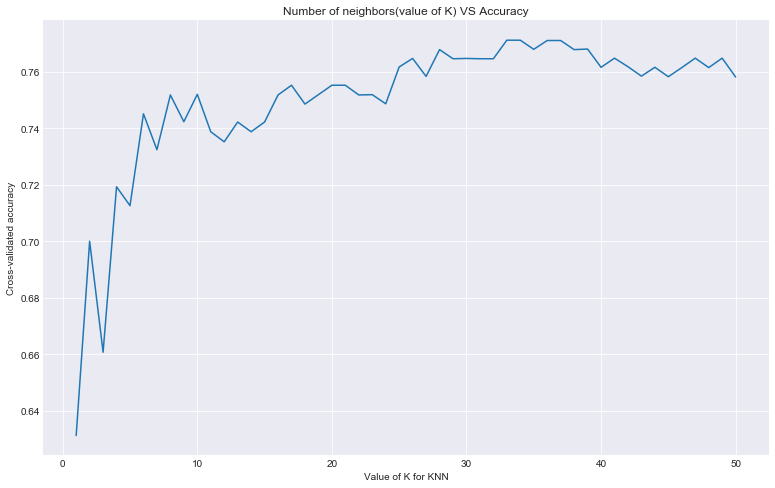

In [61]:
# plot how accuracy changes as we vary k

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.figure(figsize=[13,8])
plt.plot(k_ranges, k_scores)
plt.title('Number of neighbors(value of K) VS Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [62]:
# Now use this k value in the classifier
classifier_remod = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [66]:
# Using remod
scoresmod = cross_val_score(classifier_remod, X,y, cv=10)
print 'Cross-validated scores:', scoresmod

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [67]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod.mean(), scoresmod.std()*2))

Accuracy: 0.75 (+/- 0.08)


In [108]:
# Confusion matrix with k=32, p=2
predicted_remod = cross_val_predict(classifier_remod, X, y, cv=10)

print classification_report(y,predicted_remod)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.51      0.23      0.32        81

avg / total       0.70      0.74      0.70       306



### Optimum value of p

In [ ]:
# Now find best value of p

In [ ]:
# We started with a p value of 2 which is the Euclidean distance
# We shall now try with a p value of 1 which is the Manhattan or taxi distance

In [71]:
classifier_remod2 = KNeighborsClassifier(n_neighbors=35,weights='distance',p=1)

In [72]:
# Using remod
scoresmod2 = cross_val_score(classifier_remod2, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [73]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod2.mean(), scoresmod2.std()*2))

Accuracy: 0.73 (+/- 0.07)


In [ ]:
# The Euclidean distance(p=2) seems to be a better measure

In [104]:
# Confusion matrix with p=1
predicted_remod2 = cross_val_predict(classifier_remod2, X, y, cv=10)

print classification_report(y,predicted_remod2)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.53      0.25      0.34        81

avg / total       0.71      0.74      0.71       306



### Finding the feature with the highest accuracy score


In [76]:
# We started with all three descriptive features-age, year and nodes
# We will start with age and year and compare the scores
X = data1.iloc[:, [0,1]]
y = data1.iloc[:, 3]


In [77]:
classifier_remod3 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [78]:
# Using remod
scoresmod3 = cross_val_score(classifier_remod3, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [79]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod3.mean(), scoresmod3.std()*2))

Accuracy: 0.70 (+/- 0.11)


In [ ]:
# We will continue with age and nodes and compare the scores

In [80]:
X = data1.iloc[:, [0,2]]
y = data1.iloc[:, 3]

In [81]:
classifier_remod4 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [82]:
# Using remod
scoresmod4 = cross_val_score(classifier_remod4, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [83]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod4.mean(), scoresmod4.std()*2))

Accuracy: 0.68 (+/- 0.22)


In [ ]:
# We will continue with year and nodes and compare the scores

In [84]:
X = data1.iloc[:, [1,2]]
y = data1.iloc[:, 3]

In [85]:
classifier_remod5 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [86]:
# Using remod
scoresmod5 = cross_val_score(classifier_remod5, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [87]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod5.mean(), scoresmod5.std()*2))

Accuracy: 0.72 (+/- 0.16)


In [107]:
predicted_remod5 = cross_val_predict(classifier_remod5, X, y, cv=10)

print classification_report(y,predicted_remod5)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.51      0.23      0.32        81

avg / total       0.70      0.74      0.70       306



In [ ]:
# We shall proceed to try with individual features

In [88]:
#Using age
X = data1.iloc[:, [0]]
y = data1.iloc[:, 3]

In [89]:
classifier_remod6 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [90]:
# Using remod
scoresmod6 = cross_val_score(classifier_remod6, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [91]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod6.mean(), scoresmod6.std()*2))

Accuracy: 0.55 (+/- 0.39)


In [106]:
predicted_remod6 = cross_val_predict(classifier_remod6, X, y, cv=10)

print classification_report(y,predicted_remod6)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.51      0.23      0.32        81

avg / total       0.70      0.74      0.70       306



In [92]:
#Using year
X = data1.iloc[:, [1]]
y = data1.iloc[:, 3]

In [93]:
classifier_remod7 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [94]:
# Using remod
scoresmod7 = cross_val_score(classifier_remod7, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [95]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod7.mean(), scoresmod7.std()*2))

Accuracy: 0.74 (+/- 0.01)


In [105]:
predicted_remod7 = cross_val_predict(classifier_remod7, X, y, cv=10)

print classification_report(y,predicted_remod7)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.51      0.23      0.32        81

avg / total       0.70      0.74      0.70       306



In [96]:
#Using nodes
X = data1.iloc[:, [2]]
y = data1.iloc[:, 3]

In [97]:
classifier_remod8 = KNeighborsClassifier(n_neighbors=32,weights='distance',metric='minkowski',p=2)

In [98]:
# Using remod
scoresmod8 = cross_val_score(classifier_remod8, X,y, cv=10)
print 'Cross-validated scores:', scores

Cross-validated scores: [0.71875    0.77419355 0.67741935 0.80645161 0.70967742 0.76666667
 0.8        0.8        0.73333333 0.73333333]


In [99]:
# Print the mean score and variance
print('Accuracy: %0.2f (+/- %0.2f)'% (scoresmod8.mean(), scoresmod8.std()*2))

Accuracy: 0.74 (+/- 0.08)


In [103]:
predicted_remod8 = cross_val_predict(classifier_remod8, X, y, cv=10)

print classification_report(y,predicted_remod8)

             precision    recall  f1-score   support

          1       0.77      0.92      0.84       225
          2       0.51      0.23      0.32        81

avg / total       0.70      0.74      0.70       306



### Model 2: Decision Tree

In [ ]:
#Load Packages

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# We shall use age and nodes
A = data1.iloc[:, [0,2]]
b = data1.iloc[:, 3]

from sklearn.model_selection import train_test_split

#Split the datset into training set and test set
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size=0.2,random_state=0)

In [ ]:
#fit the data
#Select decision tree classfier
clf=DecisionTreeClassifier(criterion = "gini", random_state =100,
                              max_depth=3, min_samples_leaf=5)

fit=clf.fit(A_train,b_train)


In [ ]:
#predicting the results
b_pred=fit.predict(A_test)
b_pred

In [ ]:
#Measure confusion matrix
from sklearn.metrics import confusion_matrix
bm=confusion_matrix(b_test,b_pred)
print bm

In [ ]:
#Classification precision/recall/f1score
from sklearn.metrics import classification_report
print classification_report(b_test,b_pred)

In [ ]:
#Visualising the tree
from sklearn import tree


In [ ]:
#def visualize_tree(tree, feature_names):
with open('haberman_data2.dot', 'w') as f:
    f = tree.export_graphviz(clf,feature_names=["age","node"],out_file=f, filled=True, rounded=True, special_characters=True)

    

In [ ]:
from sklearn.metrics import accuracy_score
print "Accuracy is ", accuracy_score(b_test,b_pred)*100